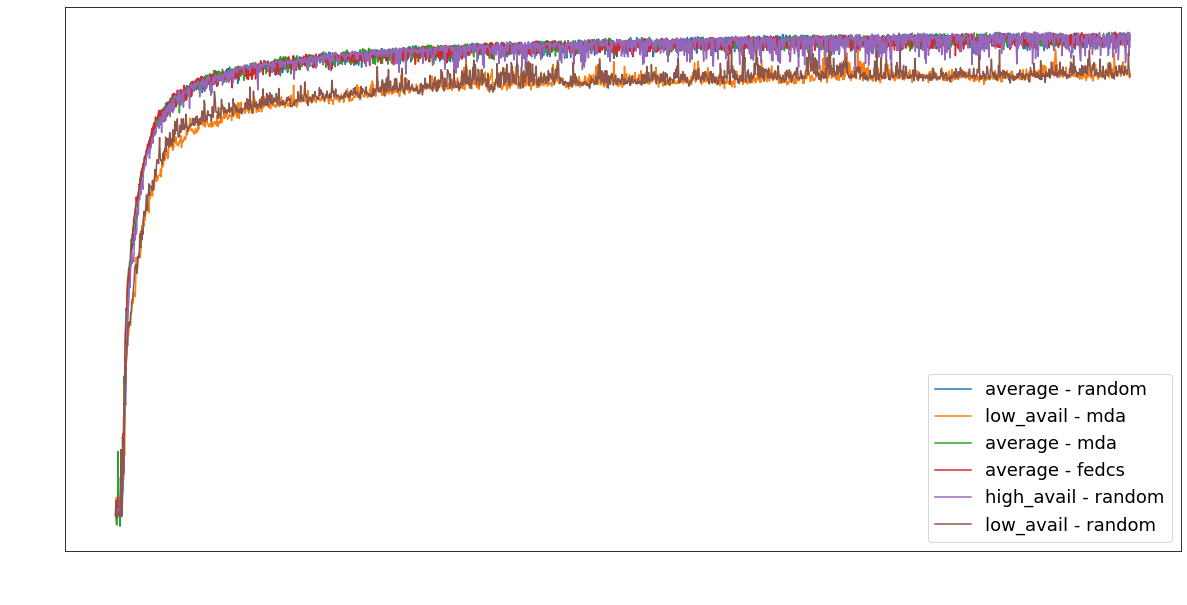

,average - random,low_avail - mda,average - mda,average - fedcs,high_avail - random,low_avail - random
finish_time,250424.409592,249447.063477,248605.038202,124949.684525,236739.413267,253605.932325
mean_acc,0.840381,0.782702,0.840225,0.839166,0.839800,0.785071
std_acc,0.007056,0.006984,0.006510,0.007302,0.012053,0.008408
avg_failed,0.117500,0.115000,0.106000,0.080000,0.077000,0.135000
rounds_failed,222.000000,214.000000,203.000000,154.000000,148.000000,250.000000
unique_participants,2788.000000,1779.000000,2767.000000,2047.000000,2780.000000,1900.000000


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import re
import os
import pandas as pd
import ast

plt.rcParams.update({
    'font.size': 18,
    'text.color': 'black',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white'
})
plt.figure(figsize=(20, 10))

data = {}


def extract_file_data(file):
    with open(file) as file:
        raw = file.read()
        failed = re.compile('Round \d+ failed clients: (\[[^]]*])').findall(raw)
        failed = list(map(len, map(ast.literal_eval, failed)))
        avg_failed = np.mean(failed)
        rounds_failed = len(list(filter(lambda x: x > 0, failed)))
        selected = re.compile('Sampled clients for round \d+: (\[[^]]*])').findall(raw)
        selected = list(map(ast.literal_eval, selected))
        unique_participants = len(set().union(*selected))
        return avg_failed, unique_participants, rounds_failed


for dir in os.listdir('results'):
    config = ''
    with open('results/' + dir + '/args.txt') as args:
        args = args.read()
        config = re.compile('trace_distro = (\S+)').search(args).group(1)
        config += ' - ' + re.compile('selector = (\S+)').search(args).group(1)
    accuracies = np.load('results/' + dir + '/accuracies.npy')
    for file in os.listdir('results/' + dir):
        if file.startswith('run.sh'):
            avg_failed, unique_participants, rounds_failed = extract_file_data('results/' + dir + '/' + file)

    plt.plot(range(len(accuracies)), accuracies, label=config)
    times = np.load('results/' + dir + '/times.npy')
    data[config] = {
        'finish_time': times[-1],
        'mean_acc': accuracies[1500:].mean(),
        'std_acc': accuracies[1500:].std(),
        'avg_failed': avg_failed,
        'rounds_failed': rounds_failed,
        'unique_participants': unique_participants
    }

plt.xlabel('Round number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

pd.DataFrame(data)